In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import cvxpy

plt.style.use("ggplot")

## Homework 4

Question A

In [2]:
start_date = '2017-01-01'
end_date = '2022-01-01'

sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_tickers

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [3]:
np.random.seed(42)
tickers = []
for sector, sector_tickers in sp500_tickers.groupby("GICS Sector"):
    tickers.append(sector_tickers.sample(5))
tickers = pd.concat(tickers)
tickers.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
170,EA,Electronic Arts,Communication Services,Interactive Home Entertainment,"Redwood City, California",2002-07-22,712515,1982
338,NWSA,News Corp (Class A),Communication Services,Publishing,"New York City, New York",2013-08-01,1564708,2013 (1980)
5,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
356,OMC,Omnicom Group,Communication Services,Advertising,"New York City, New York",1997-12-31,29989,1986
259,IPG,Interpublic Group of Companies (The),Communication Services,Advertising,"New York City, New York",1992-10-01,51644,1961 (1930)


In [4]:
data = yf.download(tickers["Symbol"].tolist(), start=start_date, end=end_date)
data

[*********************100%***********************]  55 of 55 completed


Adj Close                                                         \
                   AAP       AMCR        APH       ATVI       BBWI         BG   
Date                                                                            
2017-01-03  158.060898   8.131392  31.703165  35.324673  43.159164  60.739571   
2017-01-04  159.358032   8.131392  31.938244  36.018826  43.651806  59.935131   
2017-01-05  159.246826   8.131392  31.768988  36.577995  40.216190  58.964832   
2017-01-06  157.162186   8.131392  32.008778  36.549084  39.691120  58.168678   
2017-01-09  157.069550   8.131392  31.679651  36.346622  39.736504  58.168678   
...                ...        ...        ...        ...        ...        ...   
2021-12-27  225.459137  11.225086  85.720245  65.063255  68.098099  88.494354   
2021-12-28  227.013046  11.272609  85.907600  66.276047  66.985901  89.145485   
2021-12-29  229.777649  11.358151  86.716187  66.763161  67.805412  89.611961   
2021-12-30  226.431519  11.367657  85.808983  67.091202  68.000526  89.466179   
2021-12-31  228.681351  11.415181  86.242867  66.136879  68.088341  90.729561   

                                                          ...  Volume  \
                    BR        BSX         BXP          C  ...     RMD   
Date                                                      ...           
2017-01-03   59.240993  21.879999  101.391769  49.897877  ...  573900   
2017-01-04   59.636349  22.080000  104.612579  50.573158  ...  758800   
2017-01-05   59.330853  22.049999  105.114838  49.691990  ...  627000   
2017-01-06   59.573467  22.150000  104.875671  49.864933  ...  481900   
2017-01-09   59.438663  22.190001  103.831299  49.593178  ...  482800   
...                ...        ...         ...        ...  ...     ...   
2021-12-27  180.141159  43.119999  107.729462  57.110588  ...  201700   
2021-12-28  179.633392  43.240002  107.181053  57.082336  ...  156400   
2021-12-29  178.901016  43.169998  107.432030  57.007008  ...  247700   
2021-12-30  178.569016  42.990002  108.481972  56.903427  ...  178200   
2021-12-31  178.520218  42.480000  107.975746  56.865757  ...  293800   

                                                                           \
               SEDG      SPG      SRE     STLD      TER     TRGP     TSCO   
Date                                                                        
2017-01-03  1123600  2751200  1113200  2551000  1650700  1799700  1253300   
2017-01-04  1363300  1991700  1389100  3852700  2448400  1339200  1415000   
2017-01-05   647700  2186400  2008100  3516600  1590500  1393300  1515000   
2017-01-06   537300  2251400   934600  2743600  2354000  1720500  1464200   
2017-01-09   733400  1954000  1005100  2120200  1966000  2407400   877700   
...             ...      ...      ...      ...      ...      ...      ...   
2021-12-27   514400   994400   734200   680400  1019200   852100   381500   
2021-12-28   332800   966400   617500   815400  1107100   934200   343400   
2021-12-29   318400   953000  1444500  1183600   569700   665300   525000   
2021-12-30   329800  1085400   733300   651000   932300   770000   361800   
2021-12-31   199300  1194700   730700   645000  1062700  1352800   307500   

                               
                   V       WY  
Date                           
2017-01-03  13785200  2650200  
2017-01-04   8033100  3678500  
2017-01-05   7805100  3548000  
2017-01-06   8898300  2679300  
2017-01-09   7305300  4017600  
...              ...      ...  
2021-12-27   4818400  2282600  
2021-12-28   4279800  1783300  
2021-12-29   3223100  2193800  
2021-12-30   3812800  2131800  
2021-12-31   4723300  1882700  

[1259 rows x 330 columns]

In [5]:
adj_close = data['Adj Close']
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
adj_close = adj_close.reindex(all_weekdays)
adj_close = adj_close.fillna(method='ffill')
# adj_close = adj_close.dropna(axis=0)
adj_close

,AAP,AMCR,APH,ATVI,BBWI,BG,BR,BSX,BXP,C,...,RMD,SEDG,SPG,SRE,STLD,TER,TRGP,TSCO,V,WY
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,158.060898,8.131392,31.703165,35.324673,43.159164,60.739571,59.240993,21.879999,101.391769,49.897877,...,57.594509,13.200000,131.359848,83.024948,31.384254,24.433266,41.924999,69.209061,76.093666,23.215040
2017-01-04,159.358032,8.131392,31.938244,36.018826,43.651806,59.935131,59.636349,22.080000,104.612579,50.573158,...,57.966377,14.400000,132.410065,83.739197,32.745022,24.577681,42.134689,70.020599,76.715843,23.421495
2017-01-05,159.246826,8.131392,31.768988,36.577995,40.216190,58.964832,59.330853,22.049999,105.114838,49.691990,...,57.520126,13.800000,132.640259,83.542152,32.927040,24.683569,42.655323,68.962852,77.615547,23.666187
2017-01-06,157.162186,8.131392,32.008778,36.549084,39.691120,58.168678,59.573467,22.150000,104.875671,49.864933,...,57.771141,13.750000,134.388168,84.494492,31.869625,24.693197,42.959034,68.534294,78.687569,23.589722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,225.459137,11.225086,85.720245,65.063255,68.098099,88.494354,180.141159,43.119999,107.729462,57.110588,...,259.023285,285.600006,146.977905,125.384346,61.176147,167.646378,50.855633,226.270844,215.154434,36.320240
2021-12-28,227.013046,11.272609,85.907600,66.276047,66.985901,89.145485,179.633392,43.240002,107.181053,57.082336,...,257.857025,278.820007,146.365616,125.991219,60.747108,163.717758,50.662045,225.977554,215.569641,36.503399
2021-12-29,229.777649,11.358151,86.716187,66.763161,67.805412,89.611961,178.901016,43.169998,107.432030,57.007008,...,258.074402,278.040009,147.284058,126.626999,60.815357,165.866074,50.274864,231.441986,215.688263,37.254349
2021-12-30,226.431519,11.367657,85.808983,67.091202,68.000526,89.466179,178.569016,42.990002,108.481972,56.903427,...,258.944214,282.350006,148.471527,126.935272,60.590157,162.832596,49.848976,231.402924,215.391693,37.519924


In [6]:
adj_close.describe()

,AAP,AMCR,APH,ATVI,BBWI,BG,BR,BSX,BXP,C,...,RMD,SEDG,SPG,SRE,STLD,TER,TRGP,TSCO,V,WY
count,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,...,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000
mean,142.289390,9.326735,49.070725,65.301400,29.908828,58.395921,112.478052,35.589946,100.646342,56.897238,...,138.797566,118.637849,113.732573,109.712051,36.426466,65.686542,34.401781,104.959716,158.777880,26.125560
std,32.939128,1.117400,12.728670,15.753249,15.756674,13.158191,31.166190,6.349320,12.345765,8.324515,...,61.132244,105.375706,27.684201,14.880238,11.547762,36.910322,9.727287,46.921999,45.931309,4.514089
min,70.084999,5.264850,31.312922,35.324673,7.183747,27.742783,59.070263,21.879999,63.715427,31.289047,...,57.520126,12.300000,37.024483,79.592377,14.355666,24.433266,4.441022,45.949879,76.093666,11.866330
25%,123.493801,8.456686,40.968826,53.063372,19.098999,49.146950,90.662750,28.965000,96.583094,51.773143,...,92.293097,37.995000,111.762312,96.543589,28.906590,36.861183,32.015874,68.923876,119.448002,22.902975
50%,144.043236,9.240533,45.004837,63.346111,25.562892,57.729136,113.109268,36.889999,102.426270,57.810963,...,119.386719,62.514999,121.029461,110.703598,32.050291,47.321360,35.650316,89.546581,162.610802,26.000572
75%,155.411415,10.098585,53.816298,77.462273,35.435171,65.819788,132.494255,41.147499,108.969847,62.896619,...,182.782566,219.215004,131.533123,122.765778,41.053807,87.888557,40.317438,135.972305,198.495277,29.079542
max,229.777649,11.978515,86.716187,102.699326,76.459137,93.314606,180.141159,45.880001,127.717178,74.105110,...,293.434784,368.329987,156.517838,144.715866,70.997650,167.646378,55.976040,233.240692,247.302551,37.712242


In [7]:
relative_returns = adj_close.pct_change(1)
relative_returns

,AAP,AMCR,APH,ATVI,BBWI,BG,BR,BSX,BXP,C,...,RMD,SEDG,SPG,SRE,STLD,TER,TRGP,TSCO,V,WY
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.008207,0.000000,0.007415,0.019651,0.011415,-0.013244,0.006674,0.009141,0.031766,0.013533,...,0.006457,0.090909,0.007995,0.008603,0.043358,0.005911,0.005002,0.011726,0.008176,0.008893
2017-01-05,-0.000698,0.000000,-0.005299,0.015524,-0.078705,-0.016189,-0.005123,-0.001359,0.004801,-0.017424,...,-0.007698,-0.041667,0.001738,-0.002353,0.005559,0.004308,0.012356,-0.015106,0.011728,0.010447
2017-01-06,-0.013091,0.000000,0.007548,-0.000790,-0.013056,-0.013502,0.004089,0.004535,-0.002275,0.003480,...,0.004364,-0.003623,0.013178,0.011400,-0.032114,0.000390,0.007120,-0.006214,0.013812,-0.003231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.018826,0.012865,0.021985,0.004450,0.004317,0.009982,0.023240,0.009363,0.014353,0.007308,...,0.012557,0.008154,0.019105,0.005796,0.017681,0.035763,0.034048,0.014019,0.004663,0.026398
2021-12-28,0.006892,0.004234,0.002186,0.018640,-0.016332,0.007358,-0.002819,0.002783,-0.005091,-0.000495,...,-0.004503,-0.023739,-0.004166,0.004840,-0.007013,-0.023434,-0.003807,-0.001296,0.001930,0.005043
2021-12-29,0.012178,0.007589,0.009412,0.007350,0.012234,0.005233,-0.004077,-0.001619,0.002342,-0.001320,...,0.000843,-0.002797,0.006275,0.005046,0.001123,0.013122,-0.007642,0.024181,0.000550,0.020572
2021-12-30,-0.014562,0.000837,-0.010462,0.004914,0.002878,-0.001627,-0.001856,-0.004169,0.009773,-0.001817,...,0.003370,0.015501,0.008062,0.002434,-0.003703,-0.018289,-0.008471,-0.000169,-0.001375,0.007129


Question B

In [8]:
def get_min_var_portfolio(train_data):
    C = train_data.cov()
    C_inv = np.linalg.inv(C)
    e = np.ones(C_inv.shape[0])
    X_mvp = C_inv @ e / (e @ C_inv @ e)
    X_mvp /= X_mvp.sum() # renormalize the weights
    return X_mvp

def get_mean_std(portfolio, data):
    C = data.cov()
    R = data.mean(axis=0).values
    portfolio_returns = portfolio @ R
    portfolio_std = np.sqrt(portfolio @ C @ portfolio)
    return portfolio_returns, portfolio_std

Question C

In [9]:
x_mvp = get_min_var_portfolio(relative_returns)
print("MVP portfolio:", x_mvp)


MVP portfolio: [-6.86800025e-03 -1.26280175e-01 -2.00055310e-01  5.74513208e-02
  2.15126942e-02 -4.92139347e-03  1.76026208e-01 -4.99425744e-02
 -1.40051101e-01 -4.73166916e-02  1.63337345e-01  1.71728995e-01
  4.46813962e-02 -4.96973361e-02  8.10855804e-02  1.09378478e-01
  1.33417312e-01 -3.48643179e-01  6.51761575e-01  6.03397972e-02
  1.22304701e-01 -1.44101164e-01  1.71991893e-01  1.23660215e-01
 -1.40665775e-01  4.79929187e-02 -9.82878054e-03  1.50461606e-01
 -8.53843708e-02 -2.54601804e-02  1.41879152e-01  1.64289136e-01
 -6.05919333e-02 -2.15743219e-01 -3.74877299e-02  1.09893441e-01
 -6.76474759e-02  3.52466179e-02  1.87669571e-01  4.47761827e-02
  7.45965127e-02  1.43107162e-01  2.33808581e-01 -8.28547024e-02
 -4.40042082e-02 -1.03852046e-01 -2.06405448e-04 -4.65263709e-02
 -6.49773145e-02 -2.83210070e-02 -4.17050254e-02 -2.80678133e-02
  1.06529904e-01  8.11488617e-03 -3.35841899e-01]


In [10]:
mvp_mean_rr, mvp_std_rr = get_mean_std(x_mvp, relative_returns)
print("MVP Mean:", mvp_mean_rr)
print("MVP STD:", mvp_std_rr)

MVP Mean: 0.0006904755841530043
MVP STD: 0.009688321753025728


Question D

We will solve the following optimization:

$$
min_x : x^T C x + \tau \cdot ||x||_1
$$


In [11]:
C = relative_returns.cov().values
n = C.shape[0]
C.shape, type(C)

((55, 55), numpy.ndarray)

In [12]:
def find_min_var_l1(train_data, tau):
    C = train_data.cov().values
    x = cvxpy.Variable(len(C))
    c = cvxpy.Constant(C)
    obj = cvxpy.Minimize( cvxpy.quad_form(x, c, assume_PSD=True) + tau * cvxpy.norm1(x))
    constraints = [ cvxpy.sum(x) == 1, x >= 0 ]
    prob = cvxpy.Problem(obj, constraints)
    prob.solve()
    return x.value

In [13]:
x_l1_reg = find_min_var_l1(relative_returns, 0.01)
x_l1_reg

array([-6.38745667e-07,  6.32128684e-02, -8.05189442e-07,  2.83607254e-02,
       -3.49745775e-06,  2.14330934e-02,  3.83106037e-02, -1.93492432e-07,
        1.08383774e-06, -1.79963056e-06,  6.63984361e-02, -4.28219006e-07,
        7.56658311e-02,  1.26065670e-02, -2.84607900e-06,  8.10392422e-02,
       -6.31396993e-06,  3.66420895e-06, -1.40295730e-06,  4.11869093e-02,
        4.08395743e-02, -1.86518218e-06,  1.20692895e-06, -1.68150820e-06,
       -4.99083193e-06,  1.08149697e-02,  2.73148892e-03,  3.79918372e-02,
        1.62164987e-06, -8.48137726e-07,  7.82486649e-02,  5.31055994e-04,
       -1.36429326e-06, -2.40298357e-07,  1.05243476e-06,  5.05818531e-02,
       -4.31456966e-06, -8.65330541e-08,  1.02968553e-01, -1.45058320e-06,
        1.67267004e-02,  8.79854970e-02,  8.22460096e-02, -1.57427260e-06,
       -1.86721364e-06,  1.15563734e-06,  6.02197540e-07, -9.45281869e-07,
        1.98851983e-06, -3.89171328e-06,  5.98178856e-07, -3.00671945e-06,
        6.01527487e-02, -

Question E

In [14]:
get_rr_by_year = lambda year: relative_returns[relative_returns.index.year == year]
get_rr_by_year(2021)

,AAP,AMCR,APH,ATVI,BBWI,BG,BR,BSX,BXP,C,...,RMD,SEDG,SPG,SRE,STLD,TER,TRGP,TSCO,V,WY
2021-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-04,-0.001079,-0.033135,-0.017206,-0.031772,0.064802,0.001982,-0.011031,-0.018915,-0.039247,-0.024651,...,-0.001788,-0.024348,-0.028963,-0.028334,-0.006781,-0.005839,-0.008340,-0.006189,-0.004435,-0.021473
2021-01-05,-0.001081,0.007030,0.017274,0.008788,0.020960,0.025719,0.001386,0.027502,-0.008038,0.025939,...,0.011453,0.017537,0.004347,-0.003150,0.036319,0.019297,0.061927,0.007015,-0.014925,0.009448
2021-01-06,0.057772,0.027923,0.024859,-0.029662,0.077170,0.041098,0.026760,0.014349,0.014763,0.057537,...,-0.006523,0.098861,0.022845,0.003241,0.070619,0.007573,0.027718,0.036818,-0.008811,0.005133
2021-01-07,0.008541,-0.008489,0.014329,0.018977,0.060161,-0.010403,-0.001027,-0.005441,-0.012798,0.011801,...,0.009615,0.051245,0.000705,-0.031580,-0.019198,0.061269,0.067250,0.008569,0.005597,0.009613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.018826,0.012865,0.021985,0.004450,0.004317,0.009982,0.023240,0.009363,0.014353,0.007308,...,0.012557,0.008154,0.019105,0.005796,0.017681,0.035763,0.034048,0.014019,0.004663,0.026398
2021-12-28,0.006892,0.004234,0.002186,0.018640,-0.016332,0.007358,-0.002819,0.002783,-0.005091,-0.000495,...,-0.004503,-0.023739,-0.004166,0.004840,-0.007013,-0.023434,-0.003807,-0.001296,0.001930,0.005043
2021-12-29,0.012178,0.007589,0.009412,0.007350,0.012234,0.005233,-0.004077,-0.001619,0.002342,-0.001320,...,0.000843,-0.002797,0.006275,0.005046,0.001123,0.013122,-0.007642,0.024181,0.000550,0.020572
2021-12-30,-0.014562,0.000837,-0.010462,0.004914,0.002878,-0.001627,-0.001856,-0.004169,0.009773,-0.001817,...,0.003370,0.015501,0.008062,0.002434,-0.003703,-0.018289,-0.008471,-0.000169,-0.001375,0.007129


In [15]:
results = {}
for year in [2019, 2020, 2021]:
    results[year] = {}
    prev_2_year = relative_returns[(relative_returns.index.year >= (year - 2)) & (relative_returns.index.year < (year))]
    prev_2_year = prev_2_year.dropna(axis=1, how="all") # remove stocks without any data
    current_year_rr = relative_returns[relative_returns.index.year == year][prev_2_year.columns]
    
    x_mvp = get_min_var_portfolio(prev_2_year)
    results[year]['mvp_mean'], results[year]['mvp_std'] = get_mean_std(x_mvp, prev_2_year)
    results[year]['mvp_mean_actual'], results[year]['mvp_std_actual'] = get_mean_std(x_mvp, current_year_rr)

    for tau in [0.01, 0.1, 0.5]:
        x_l1_reg = find_min_var_l1(prev_2_year, tau)
        results[year][f'l1_reg_{tau}_mean'], results[year][f'l1_reg_{tau}_std'] = get_mean_std(x_l1_reg, prev_2_year)
        results[year][f'l1_reg_{tau}_mean_actual'], results[year][f'l1_reg_{tau}_std_actual'] = get_mean_std(x_l1_reg, current_year_rr)

results = pd.DataFrame(results)
results

,2019,2020,2021
mvp_mean,0.000209,0.000458,0.000461
mvp_std,0.004677,0.005228,0.009069
mvp_mean_actual,0.000804,0.000367,0.000749
mvp_std_actual,0.005465,0.019400,0.008272
l1_reg_0.01_mean,0.000173,0.000405,0.000792
l1_reg_0.01_std,0.004938,0.005584,0.011610
l1_reg_0.01_mean_actual,0.000899,0.000481,0.000749
l1_reg_0.01_std_actual,0.005363,0.020244,0.006730
l1_reg_0.1_mean,0.000173,0.000409,0.000798
l1_reg_0.1_std,0.004959,0.005686,0.011625


Question F

In [16]:
three_year_avg = results.mean(axis=1)
three_year_avg

mvp_mean                   0.000376
mvp_std                    0.006325
mvp_mean_actual            0.000640
mvp_std_actual             0.011046
l1_reg_0.01_mean           0.000456
l1_reg_0.01_std            0.007378
l1_reg_0.01_mean_actual    0.000710
l1_reg_0.01_std_actual     0.010779
l1_reg_0.1_mean            0.000460
l1_reg_0.1_std             0.007423
l1_reg_0.1_mean_actual     0.000690
l1_reg_0.1_std_actual      0.010748
l1_reg_0.5_mean            0.000463
l1_reg_0.5_std             0.007406
l1_reg_0.5_mean_actual     0.000694
l1_reg_0.5_std_actual      0.010743
dtype: float64

Question G

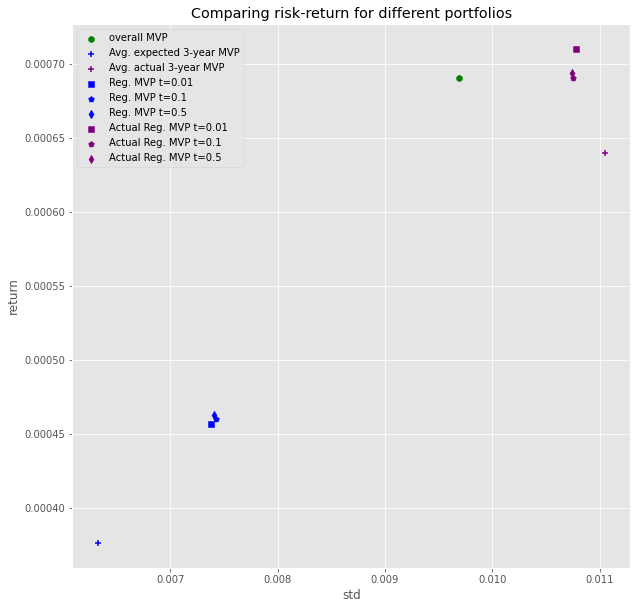

In [17]:
plt.figure(figsize=(10,10))

# overall - green
# expected - blue
# actual - purple

plt.scatter(mvp_std_rr, mvp_mean_rr, color="green", label="overall MVP")
plt.scatter(three_year_avg['mvp_std'], three_year_avg['mvp_mean'], color="blue", label="Avg. expected 3-year MVP", marker="+")
plt.scatter(three_year_avg['mvp_std_actual'], three_year_avg['mvp_mean_actual'], color="purple", label="Avg. actual 3-year MVP", marker="+")

plt.scatter(three_year_avg['l1_reg_0.01_std'], three_year_avg['l1_reg_0.01_mean'], color="blue", label="Reg. MVP t=0.01", marker="s")
plt.scatter(three_year_avg['l1_reg_0.1_std'], three_year_avg['l1_reg_0.1_mean'], color="blue", label="Reg. MVP t=0.1", marker="p")
plt.scatter(three_year_avg['l1_reg_0.5_std'], three_year_avg['l1_reg_0.5_mean'], color="blue", label="Reg. MVP t=0.5", marker="d")

plt.scatter(three_year_avg['l1_reg_0.01_std_actual'], three_year_avg['l1_reg_0.01_mean_actual'], color="purple", label="Actual Reg. MVP t=0.01", marker="s")
plt.scatter(three_year_avg['l1_reg_0.1_std_actual'], three_year_avg['l1_reg_0.1_mean_actual'], color="purple", label="Actual Reg. MVP t=0.1", marker="p")
plt.scatter(three_year_avg['l1_reg_0.5_std_actual'], three_year_avg['l1_reg_0.5_mean_actual'], color="purple", label="Actual Reg. MVP t=0.5", marker="d")


plt.title("Comparing risk-return for different portfolios")

plt.xlabel("std")
plt.ylabel("return")

# plt.axhline(0, color="black")
# plt.axvline(0, color="black")
plt.legend()
plt.show()

Question H

Q: What is the optimal $ \tau $ among the given options?

A: $ \tau = 0.5 $ is better than $ \tau = 0.1 $, However, There is no actual optimal $ \tau $. 

It can be selected based on the risk-return preference of the investor (lower risk $ \tau = 0.01$, higher risk $ \tau = 0.5$)

Question I

Q: How would you improve this result?

A: 

- We would use a rolling / expanding window instead of a single window to estimate the Mean and STD of returns for different $ \tau $.
- We would try to consider more $ \tau $ values and than interpolate the Mean and STD as a function of $ \tau $.
- Try different regularzation methods, e.g., L2 norm / L-infinity norm.
- (Best option) **Adding the expected return to the optimiztion problem**, that is:

$$
min_x : x^T C x - x^T \bar {R} + \tau \cdot ||x||_1
$$

Than we will both minimize the risk and maximize the reward at the same time (full quad form)
